# Era Legnth Analysis

In [ ]:
# change working directory
import os
os.chdir('/Users/davidhuang/Documents/GitHub/numerai-models')

In [1]:
# import dependencies
import pandas as pd
from pathlib import Path
from numerapi import NumerAPI
from utils.utils import (
    ERA_COL,
    DATA_TYPE_COL,
    TARGET_COL,
)
from utils.api_keys import PUBLIC_ID, SECRET_KEY

In [2]:
# instantiate numerai api
napi = NumerAPI(public_id=PUBLIC_ID, secret_key=SECRET_KEY)
current_round = napi.get_current_round()
print(f"Current round #: {current_round}")

Current round #: 316


In [4]:
# read the feature metadata and get the "medium" feature set
read_columns = [ERA_COL, DATA_TYPE_COL, TARGET_COL]
training_data = pd.read_parquet('data/train.parquet', columns=read_columns)
validation_data = pd.read_parquet('data/validation.parquet', columns=read_columns)
combo = pd.concat([training_data, validation_data])

In [5]:
# check data types
combo["data_type"].unique()

array(['train', 'validation', 'test'], dtype=object)

In [9]:
# check legnth of eras
eras = combo["era"].unique()
eras[0], eras[-1]

('0001', '1006')

In [10]:
# check number of era by type
combo.groupby("data_type")["era"].nunique()

data_type
test            5
train         574
validation    427
Name: era, dtype: int64

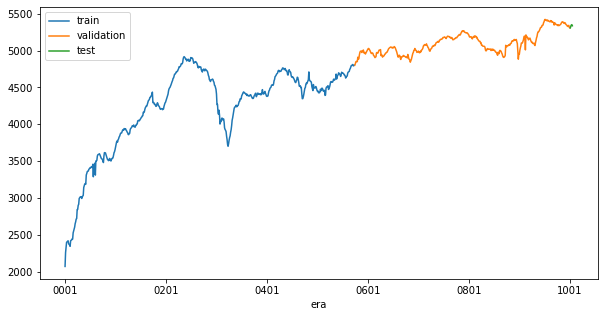

In [12]:
# plot full length by type
combo_full = pd.concat([
    pd.DataFrame(training_data.groupby("era").size()),
    pd.DataFrame(validation_data.loc[validation_data[DATA_TYPE_COL]=="validation"].groupby("era").size()),
    pd.DataFrame(validation_data.loc[validation_data[DATA_TYPE_COL]=="test"].groupby("era").size()),
], axis=1)
combo_full.columns = ["train", "validation", "test"]
combo_full.plot(figsize=(10, 5));

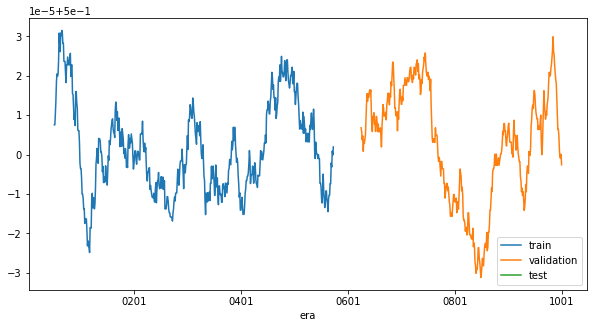

In [16]:
# plot full length by type
combo_full_target = pd.concat([
    pd.DataFrame(training_data.groupby("era")[TARGET_COL].mean()),
    pd.DataFrame(validation_data.loc[validation_data[DATA_TYPE_COL]=="validation"].groupby("era")[TARGET_COL].mean()),
    pd.DataFrame(validation_data.loc[validation_data[DATA_TYPE_COL]=="test"].groupby("era")[TARGET_COL].mean()),
], axis=1)
combo_full_target.columns = ["train", "validation", "test"]
combo_full_target.rolling(52).mean().plot(figsize=(10, 5));